In [1]:
'''
Coding: PYTHON UTF-8
Created On: 2023-05-02 14:53:08
Author: Putu Hendra Widyadharma
=== plot travel time vs distance with data selection
'''

'\nCoding: PYTHON UTF-8\nCreated On: 2023-05-02 14:53:08\nAuthor: Putu Hendra Widyadharma\n=== plot travel time vs distance with data selection\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from localfunction import *
from tqdm import trange
from sklearn.metrics import r2_score


In [3]:
path = "G:\\My Drive\\Tomography\\230623\\reloc_update_with_final_real\\"
fname = "tempwadati_relocupdate_phase_sul_2022_8P_wadatifilter_sta-rms5.txt"

In [4]:
wadati = pd.read_csv(path+fname, delim_whitespace=True)

In [ ]:
wadati = wadati[wadati['dist_from_event'] <= 500]

In [5]:
#%%
#parameter vp/vs calculation
slope, intercept = np.polyfit(wadati['tp'].astype(float),wadati['ts-tp'].astype(float),1)
predict = np.poly1d([slope, intercept])

#hitung batas atas dan bawah regresi vp/vs
predictup = np.poly1d([slope,intercept+9.5])
predictdown = np.poly1d([slope,intercept-9.5])

#hitung stdev
std = np.std(wadati['ts-tp'])

#hitung standard_error
residuals = wadati['ts-tp'].to_numpy() - predict(wadati['tp'])
residuals = residuals**2
standard_error = (sum(residuals)/(len(residuals)-2))**0.5

#cek r-square score
r2 = r2_score(wadati['ts-tp'],predict(wadati['tp']))

print('VP/VS = ' + str(slope + 1))
print(f"R-square = {r2}")
print(f"std_err = {standard_error}")

VP/VS = 1.7718466916694955
R-square = 0.985502554505072
std_err = 1.4761422811002456


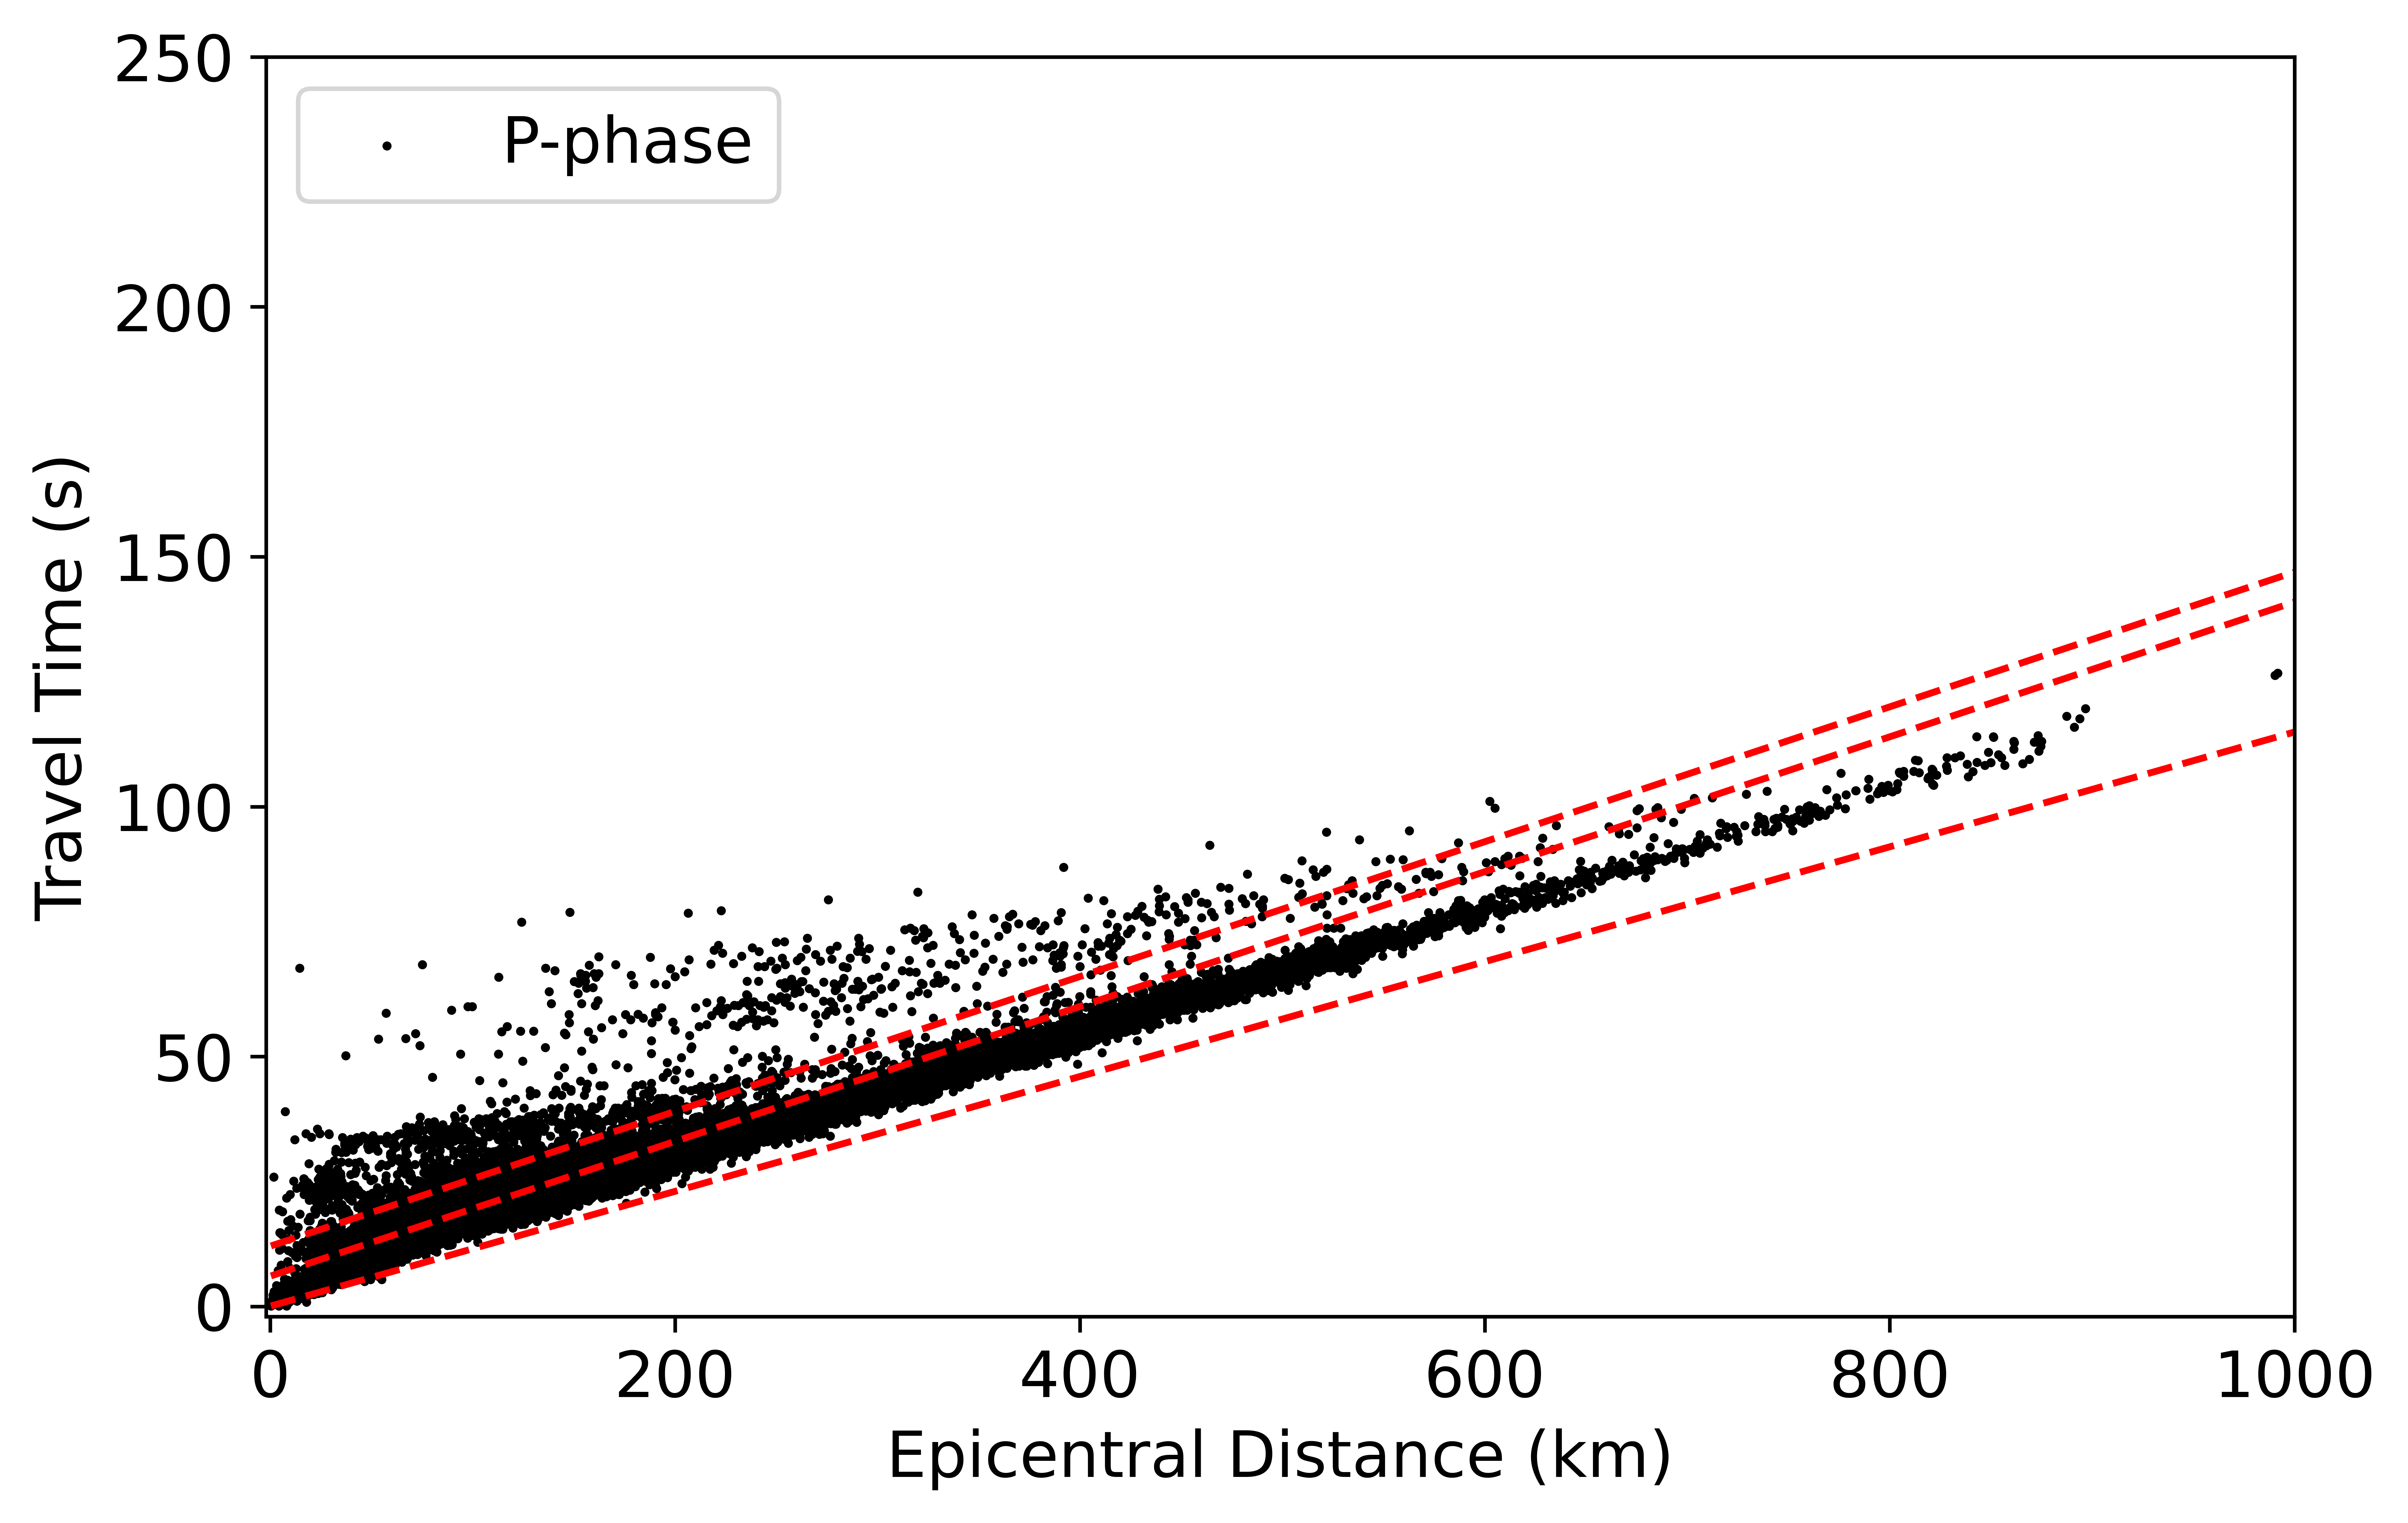

In [11]:
plt.rcParams.update({'font.size': 14})
from matplotlib import colors
from matplotlib.colors import Colormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# calculate slope and intercept
#hitung batas atas dan bawah regresi vp
slope, intercept = np.polyfit(wadati['dist_from_event'].astype(float),wadati['tp'].astype(float),1)
predict = np.poly1d([slope+0.01, intercept])
predictup = np.poly1d([slope+0.01,intercept+6])
predictdown = np.poly1d([slope-0.01,intercept-6])

#hitung batas atas dan bawah regresi vs
slope, intercept = np.polyfit(wadati['dist_from_event'].astype(float),wadati['ts'].astype(float),1)
predicts = np.poly1d([slope, intercept])
predictups = np.poly1d([slope+0.03,intercept+1])
predictdowns = np.poly1d([slope,intercept-9.5])

#perbaiki plot
wadatis = wadati.sort_values('dist_from_event')

for iter in ['p']:
    #plot
    fig, ax = plt.subplots(figsize = (5,5), dpi=1200)
    if iter == 'p':
        ax.scatter(wadatis['dist_from_event'],wadatis['tp'],color='blue',label="P-phase",edgecolors='black', s=1)
        ax.plot(wadatis['dist_from_event'],predict(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictup(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictdown(wadatis['dist_from_event']),'r--')
    if iter == 's':
        ax.scatter(wadatis['dist_from_event'],wadatis['ts'],color='red',label="S-phase",edgecolors='black', s=1)
        ax.plot(wadatis['dist_from_event'],predicts(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictups(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictdowns(wadatis['dist_from_event']),'r--')

    ax.set_xlabel('Epicentral Distance (km)')
    ax.set_ylabel('Travel Time (s)')
    ax.set_xlim([-2,1000])
    ax.set_ylim([-2,250])
    ax.legend(loc='upper left')
    fig.set_figheight(5)
    fig.set_figwidth(8)
    # fig.savefig(path+'check {} {}.jpg'.format(iter,Path(fname).stem))

In [12]:
wadati_p = wadatis.copy()
wadati_s = wadatis.copy()

def selection_data_p(row):
    if (row['tp'] <= predictup(row['dist_from_event'])) and (row['tp'] >= predictdown(row['dist_from_event'])):
        return True
    else:
        return False
def selection_data_s(row):
    if (row['ts'] <= predictups(row['dist_from_event'])) and (row['ts'] >= predictdowns(row['dist_from_event'])):
        return True
    else:
        return False
# apply perhitungan
wadati_p['result'] = wadati_p.apply(selection_data_p,axis=1)
wadati_s['result'] = wadati_s.apply(selection_data_s,axis=1)
# select wadati hanya pada event yang perlu diubah
wadati_p = wadati_p[wadati_p['result'] == True]
wadati_s = wadati_s[wadati_s['result'] == True]

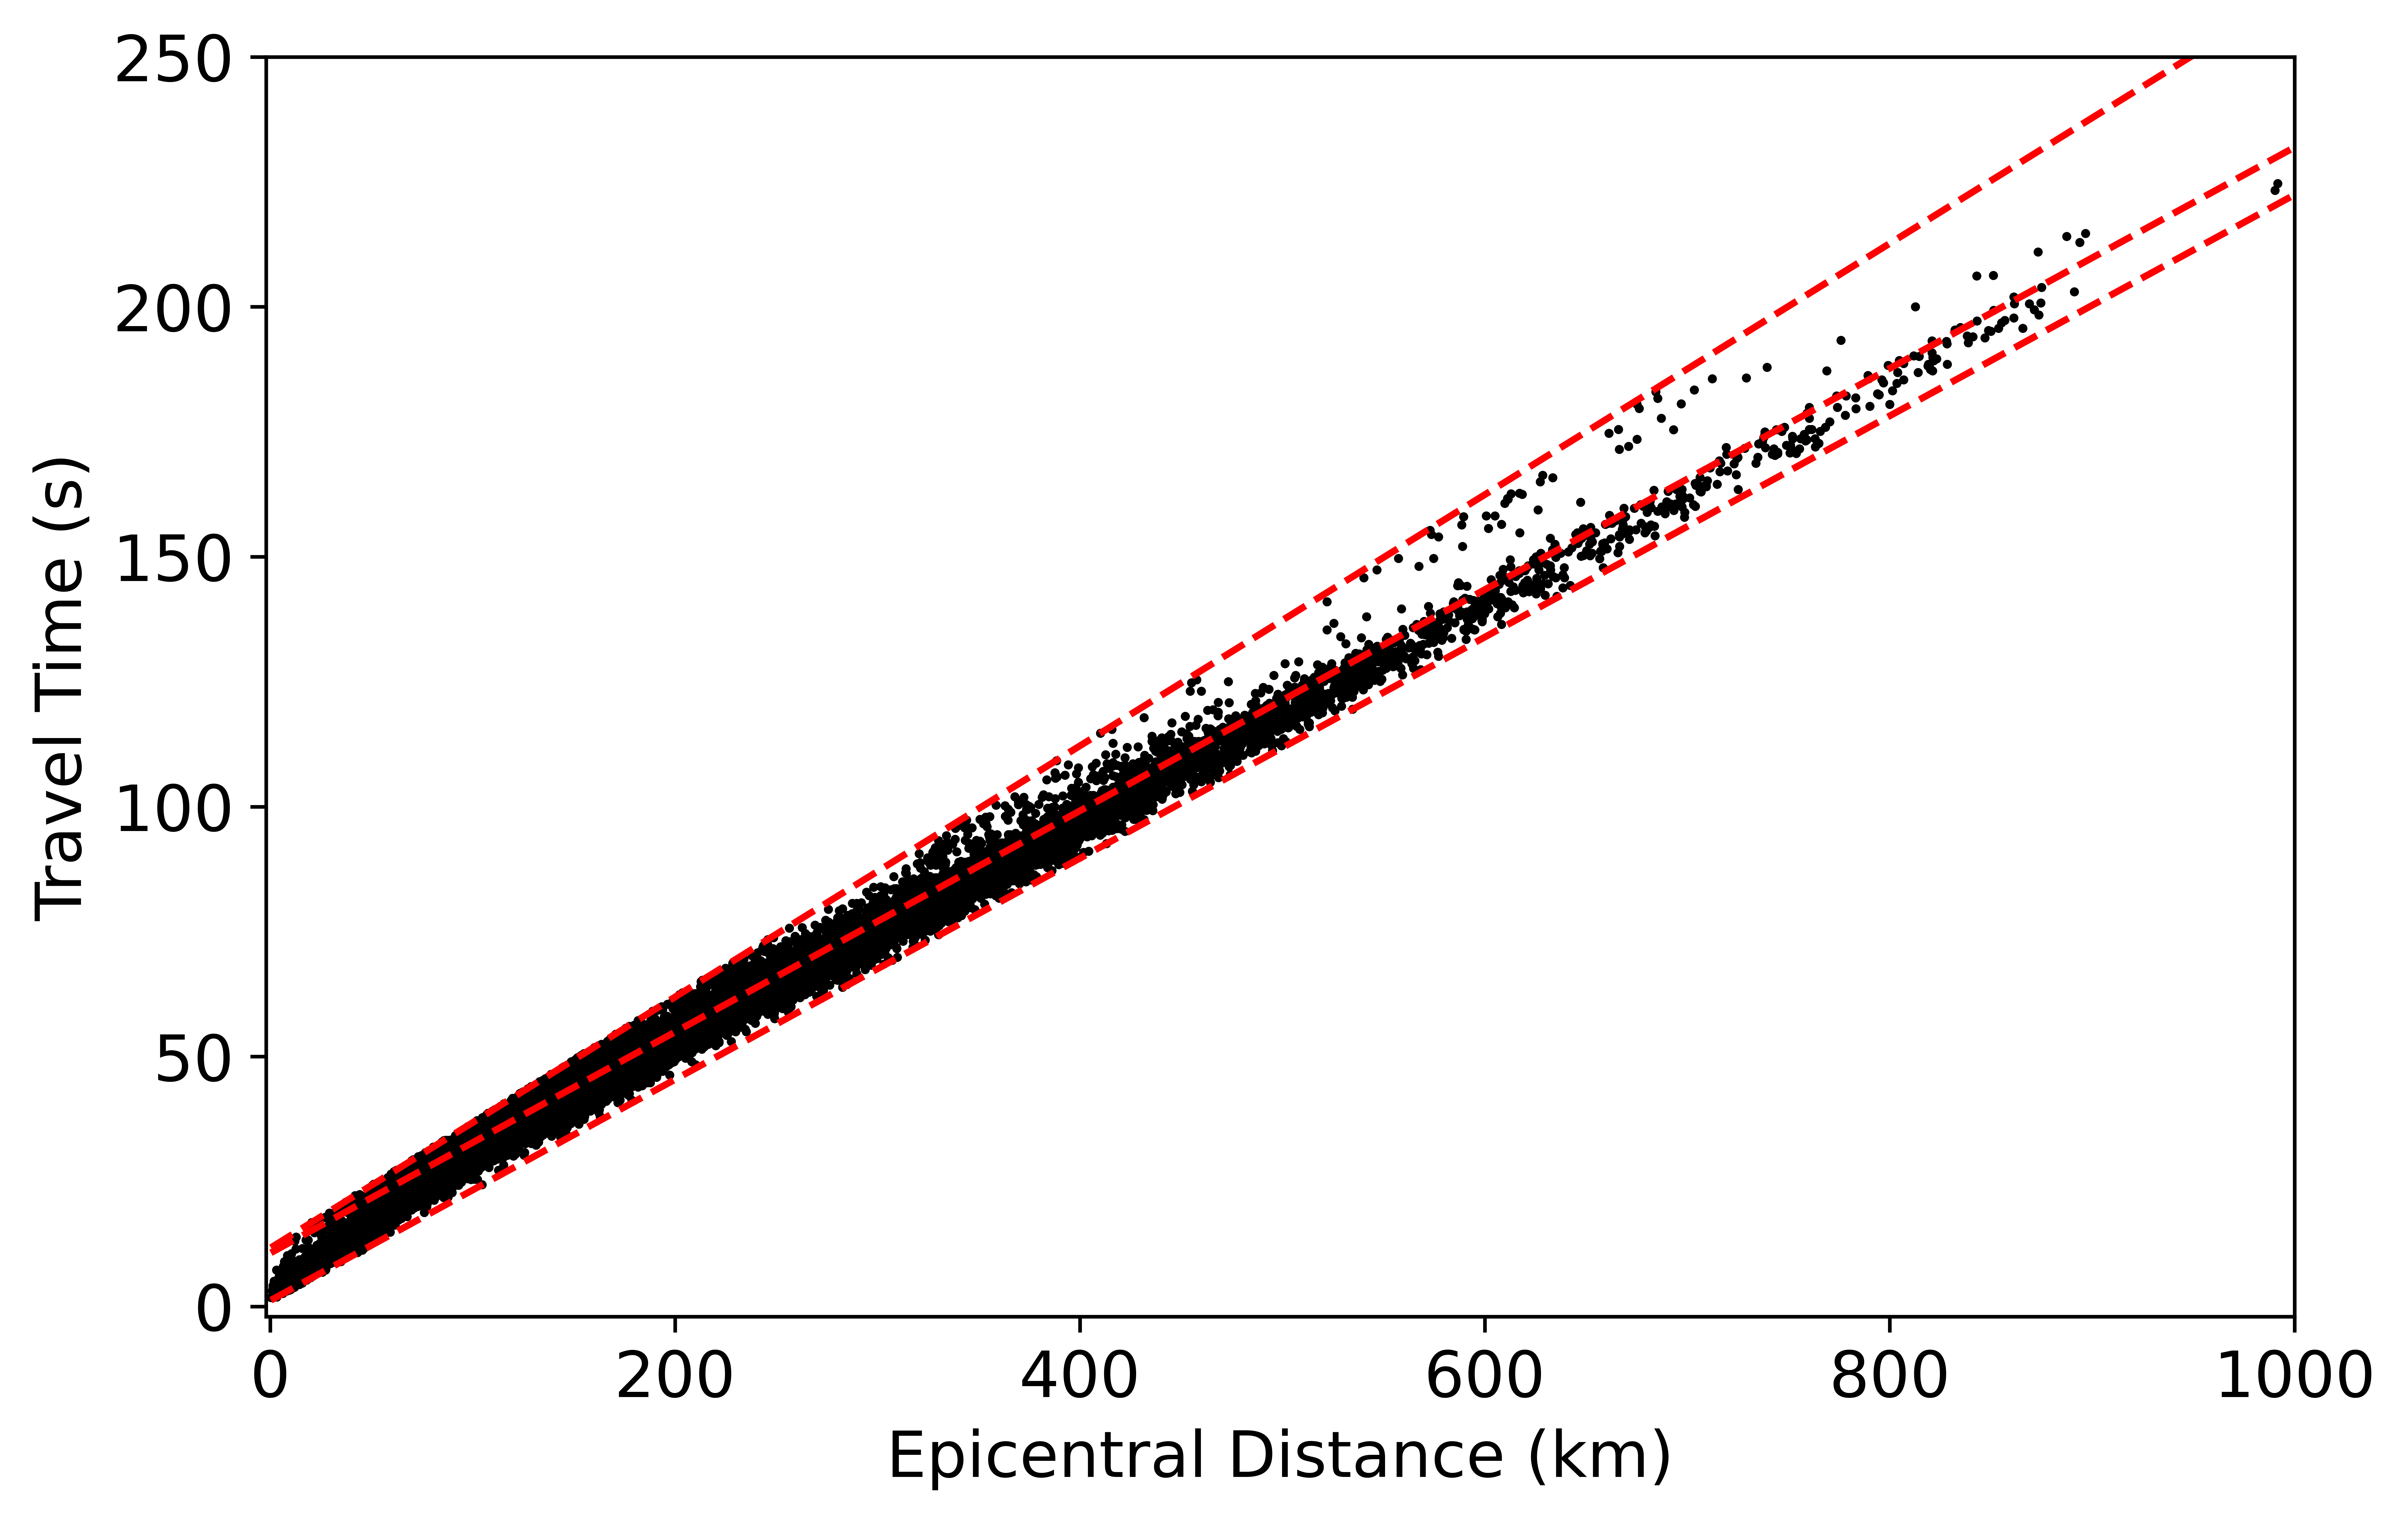

In [15]:
for iter in ['s']:
    #plot
    fig, ax = plt.subplots(figsize = (5,5), dpi=1200)
    if iter == 'p':
        ax.scatter(wadati_p['dist_from_event'],wadati_p['tp'],color='blue',label="P-phase",edgecolors='black', s=1)
        ax.plot(wadatis['dist_from_event'],predict(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictup(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictdown(wadatis['dist_from_event']),'r--')
    if iter == 's':
        ax.scatter(wadati_s['dist_from_event'],wadati_s['ts'],color='red',label="S-phase",edgecolors='black', s=1)
        ax.plot(wadatis['dist_from_event'],predicts(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictups(wadatis['dist_from_event']),'r--')
        ax.plot(wadatis['dist_from_event'],predictdowns(wadatis['dist_from_event']),'r--')
    if iter == 'ps':
        ax.scatter(wadati_p['dist_from_event'],wadati_p['tp'],color='blue',label="P-phase",edgecolors='black', s=1)
        ax.scatter(wadati_s['dist_from_event'],wadati_s['ts'],color='red',label="S-phase",edgecolors='black', s=1)

    ax.set_xlabel('Epicentral Distance (km)')
    ax.set_ylabel('Travel Time (s)')
    ax.set_xlim([-2,1000])
    ax.set_ylim([-2,250])
    # ax.legend(loc='upper left')
    fig.set_figheight(5)
    fig.set_figwidth(8)
    fig.savefig(path+'dot_selected_all {} {}.jpg'.format(iter,Path(fname).stem))